# Unsupervised Learning

## K-means clustering naive implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline

In [2]:
# Some simple utility functions
def getCentroidDistances(X, centroids):
    """
    Args: 
        X: n (samples) x d (feature dim)
        centroids: k (num centroids) x d (feature dim)

    Returns:
        centroid_distances: n x k
    """
    
    # initialize parameters
    n, d = X.shape
    k = len(centroids)
    centroid_distances = np.zeros((n, k))
    
    # compute distance to all centroids
    for ki in range(k):
        centroid_distances[:,ki] = np.linalg.norm(X - centroids[ki], axis=1, keepdims=False)
        
    return centroid_distances

def predictCluster(X, centroids):
    
    """
    Args: 
        centroid_distances: n (samples) x k (centroid distances) 

    Returns:
        cluster assignments: n (samples) x 1 
    """
    return np.argmin(getCentroidDistances(X, centroids), axis=1)

def plotClusters(X, centroids, assignments=[], show_labels=False, title=""):
    
    X_names = ['point{0}'.format(i+1) for i in range(len(X))]
    cluster_names = ['cluster{0}'.format(i) for i in range(len(centroids))]

    cmap_cluster = plt.cm.rainbow
    if len(assignments) == 0:
        colors = [1]*len(X)
        cmap_ = plt.cm.gray
    else:
        colors = assignments
        cmap_ = cmap_cluster
        
    plt.scatter(X[:,0], X[:,1], c=colors, cmap=cmap_,
                                    alpha=0.8, s=[100,100], label='data points')
    plt.scatter(centroids[:,0], centroids[:,1], c=range(len(centroids)), cmap=cmap_cluster, 
                                    alpha=0.5, s=[300,300], label='clusters')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()
    
    if show_labels:
        for label, x, y in zip(X_names, X[:, 0], X[:, 1]):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (20, 20),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.3),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

        for label, x, y in zip(cluster_names, centroids[:, 0], centroids[:, 1]):
            plt.annotate(
                label, 
                xy = (x, y), xytext = (20, -30),
                textcoords = 'offset points', ha = 'right', va = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.3),
                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
            
def updateCentroids(X, assignments):
    centroid_idxs = np.unique(assignments)
    D_, K_ = X.shape[1], len(centroid_idxs)
    centroids = np.zeros((K_, D_))
    for i in centroid_idxs:
        # Update centroid with the mean of the assigned observations
        centroids[i] = np.sum(X[assignments == i], axis=0)/float(len(X[assignments == i])) 
    return centroids

In [3]:
# Training data
# X_train = np.array([[-1.88,  2.05],
#                         [-0.71,  0.42],
#                         [ 2.41, -0.67],
#                         [ 1.85, -3.80 ],
#                         [-3.69, -1.33]])

X_train = 40. * np.random.rand(40, 2)

# Variable to store class prediction
y_pred = -1 * np.ones((len(X_train)))
N, D = X_train.shape
X_feature_range = np.vstack((X_train.min(axis=0), X_train.max(axis=0))).T # D (feature dim) x 2 (min, max)

### Step 1: Initialize cluster centers

In [4]:
K = 3
# Centroid initialization - fixed
# centroids = np.array(([[2,2], [-2,-2]]))

# Centroid initialization - uniformly at random 
centroids = X_feature_range[:,0] + np.random.rand(K, D)*(X_feature_range[:,1]-X_feature_range[:,0])

# There are many other techniques, optimized for quality and to speed up the convergence time. 
# Explore them or find the one that works best for you. 

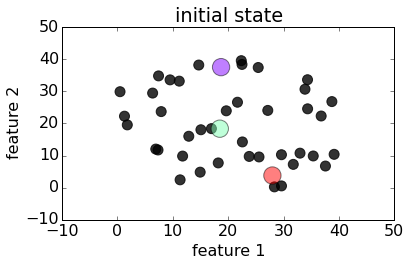

In [6]:
plotClusters(X_train, centroids, title="initial state")

### Step 2: Assign observations to closest cluster center

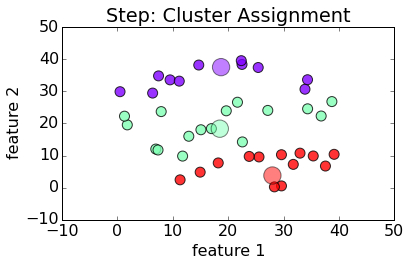

In [7]:
# Assign clusters based on least square distances
assignments = predictCluster(X_train, centroids)

# Plot data with assignments
plotClusters(X_train, centroids, assignments, title="Step: Cluster Assignment")

### Step 3: Update Centroids as means of assigned observations

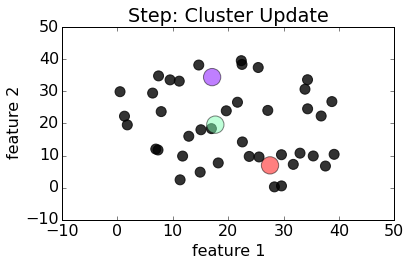

In [8]:
# New centroids
centroids = updateCentroids(X_train, assignments)

# Plot data with assignments
plotClusters(X_train, centroids, title="Step: Cluster Update")

### Repeat Step 2 and Step 3 until convergence

Stop when centroid updates are within some epsilon. 

K-Means Start..
K-Means Finished..


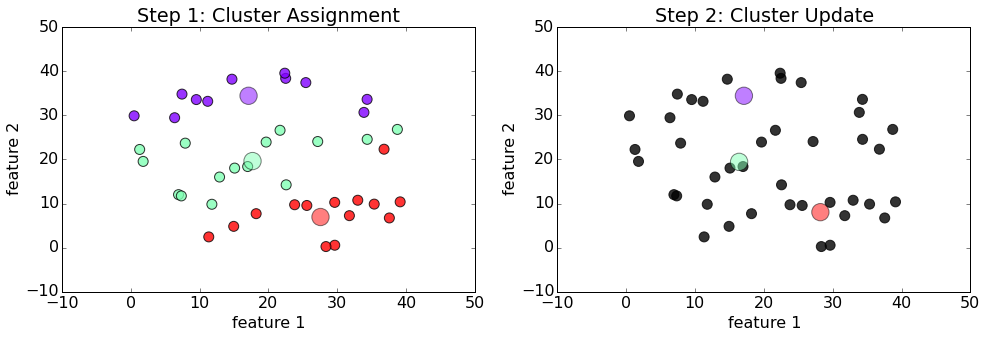

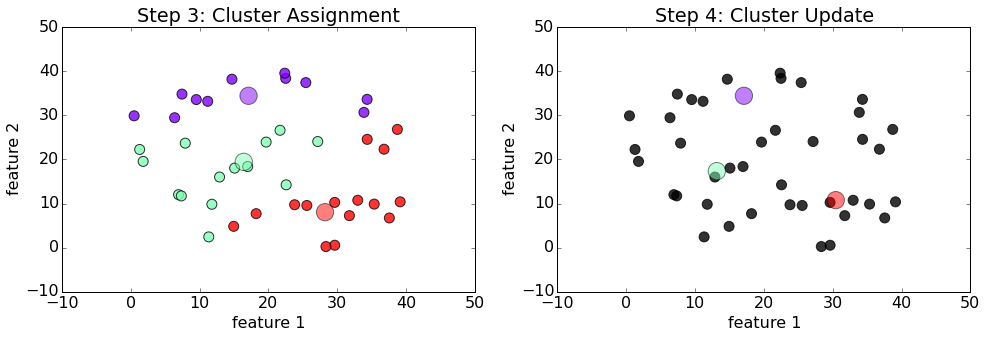

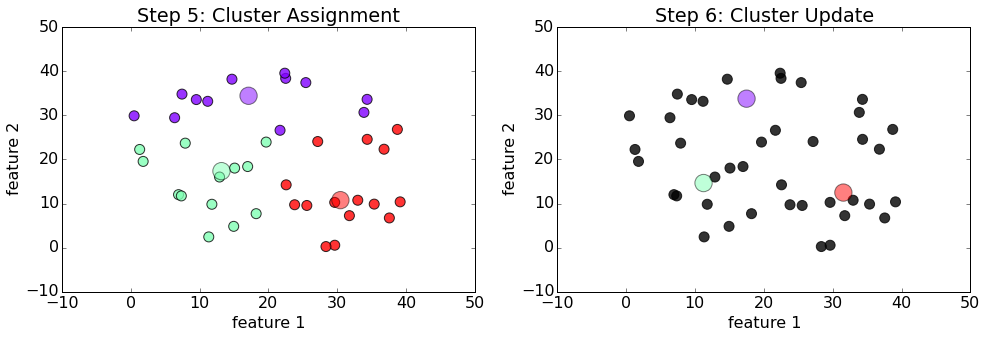

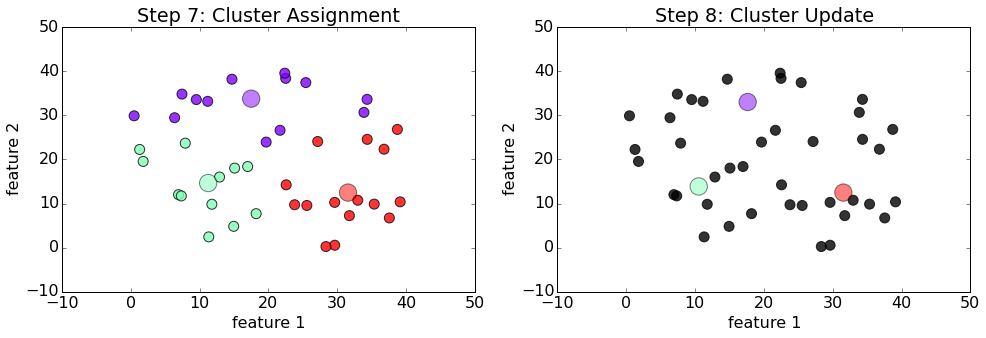

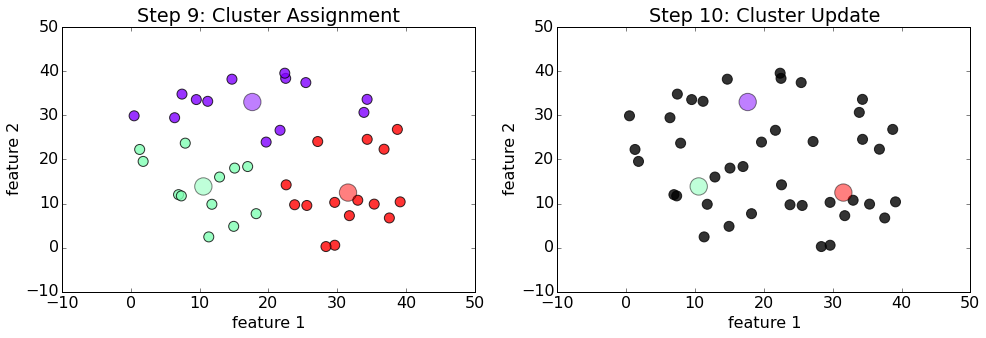

In [9]:
epsilon = 1e-2
converged = None
step= 0
# plt.figure(figsize=(7,5))
# plotClusters(X_train, centroids)

print "K-Means Start.."
while not converged:
    
    # Assign clusters based on least square distances
    assignments = predictCluster(X_train, centroids)
#     print assignments
    plt.figure(figsize=(14,5))
    
    plt.subplot(1,2,1)
    # Plot data with assignments
    plotClusters(X_train, centroids, assignments, title="Step {}: Cluster Assignment".format(2*step+1))

    # New centroids
    centroids_new = updateCentroids(X_train, assignments)
    
    plt.subplot(1,2,2)
    # Plot data with new assignments
    plotClusters(X_train, centroids_new, title="Step {}: Cluster Update".format(2*(step+1)))
    
    if np.linalg.norm(centroids-centroids_new) < epsilon:
        converged = True
        
    centroids = centroids_new
    step += 1

print "K-Means Finished.."

### Some interesting exercises to try:

- What happens when we increase or decrease the value of K? 
- What happens when we set K = N?
- What is the optimum value of K? How do we decide that?
- Does this algorithm always converge to a solution? Is it a local or global optimum?
- How can we speed up the convergence time?
- What's the running time of this algorithm?